# Class count

In [8]:
import h5py
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt 
import matplotlib
from matplotlib import rc
matplotlib.rcParams.update({'font.size': 16, 'text.usetex': False})

In [2]:
test = h5py.File("/mnt/raid/data/ni/twoears/kashefy/brir/twoears_data_test.h5", "r")
train = h5py.File("/mnt/raid/data/ni/twoears/kashefy/brir/bal_900K/twoears_data_train.h5", "r")
test_clean = h5py.File("/mnt/raid/data/ni/twoears/kashefy/localization/clean_multiAzimuth/gen20160523/ccild/pos00_0/test/dataStoreUni.mat")
train_clean = h5py.File("/mnt/raid/data/ni/twoears/kashefy/localization/clean_multiAzimuth/gen20160523/ccild/pos00_0/train/dataStoreUni.mat")

## Clean sounds

In [29]:
print train_clean.keys()
print train_clean['y'].shape

[u'#refs#', u'classnames', u'featureNames', u'x', u'y']
(12, 39436)


In [30]:
bins = []
classnames_ = train_clean['classnames']
for i in range(classnames_.shape[0]):
    st = classnames_[i][0]
    obj = train_clean[st]
    str1 = ''.join(chr(i) for i in obj[:])
    bins.append(str1)
print bins

['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire', 'footsteps', 'general', 'knock', 'phone', 'piano']


In [90]:
count_ = np.zeros(12)
for i in range(train_clean['y'].shape[1]):
    count_ += train_clean['y'][:,i] + 1
count_ = count_ / np.sum(count_)
count_, bins = (list(t) for t in zip(*sorted(zip(count_, bins), reverse=True)))
for i, cl in enumerate(bins):
    print cl, count_[i]

dog 0.277503628447
piano 0.201862602806
phone 0.100943396226
fire 0.0962264150943
general 0.0921625544267
engine 0.0813981615868
alarm 0.0437590711176
knock 0.0402999516207
footsteps 0.0375665215288
baby 0.0195694242864
female
speech 0.00870827285922
crash 0.0


In [106]:
bins = ['fire', 'engine', 'footsteps', 'alarm', 'piano', 'baby', 'dog', 'phone', 'crash', 'fem. speech', 'knock', 'general']

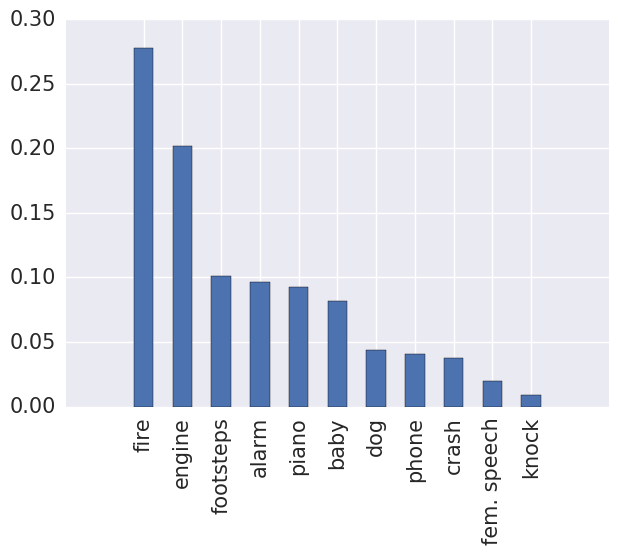

In [107]:
sns.set(font_scale=1.5)  # crazy big
fig = plt.figure(figsize=(7, 5))
#ax = fig.add_subplot(111)
plt.bar(range(11), count_[:-1], 0.5, align='center')
plt.xticks(range(11), bins[:-1], rotation='vertical')
plt.title("")
plt.show()

## Mixed sounds (identification)

In [14]:
train = h5py.File("/mnt/raid/data/ni/twoears/kashefy/brir/bal_900K/twoears_data_train.h5", "r")
test = h5py.File("/mnt/raid/data/ni/twoears/kashefy/brir/twoears_data_test.h5", "r")
count = np.sum(train["label"], axis=0) #+np.sum(test["label"], axis=0)

In [15]:
count = count / np.sum(count)

In [83]:
bins = ['alarm', 'baby', 'crash', 'dog', 'engine', 'female\nspeech', 'fire', 'footsteps', 'general', 'knock', 'phone', 'piano', 'scream']

In [17]:
count, bins = (list(t) for t in zip(*sorted(zip(count, bins), reverse=True)))

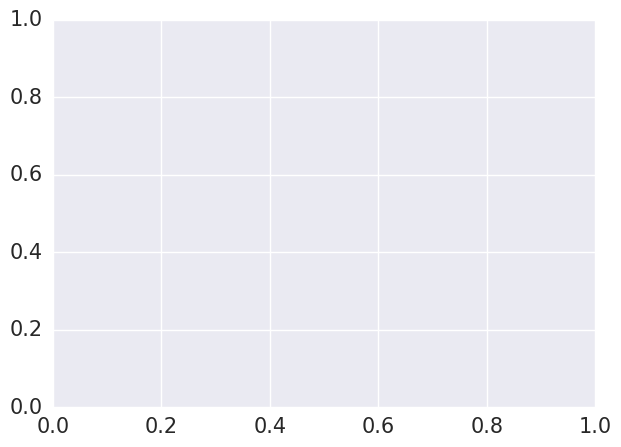

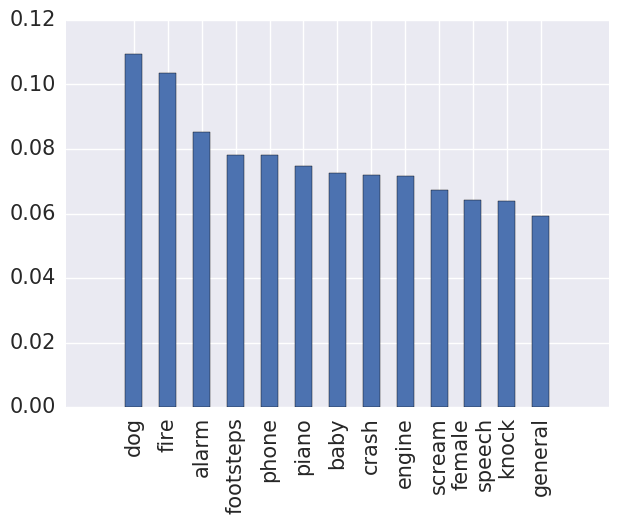

In [20]:
sns.set(font_scale=1.5)  # crazy big
fig = plt.figure(figsize=(7, 5))
#ax = fig.add_subplot(111)
plt.bar(range(13), count, 0.5, align='center')
plt.xticks(range(13), bins, rotation='vertical')
plt.title("")
plt.show()

## Mixed sounds (localization)

In [22]:
azimuths = np.squeeze(np.load('/mnt/raid/data/ni/twoears/kashefy/brir/label_id_loc_test_sum.npy'))
nbSources = np.squeeze(np.load('/mnt/raid/data/ni/twoears/kashefy/brir/label_nSrcs_hist_test.npy'))

In [23]:
azimuths.shape

(13, 73)

In [95]:
classs = 0
bins = np.arange(-180,180,5)
count = azimuths[classs,:-1]
count = count / np.sum(count)
count, bins = (list(t) for t in zip(*sorted(zip(count, bins), reverse=True)))

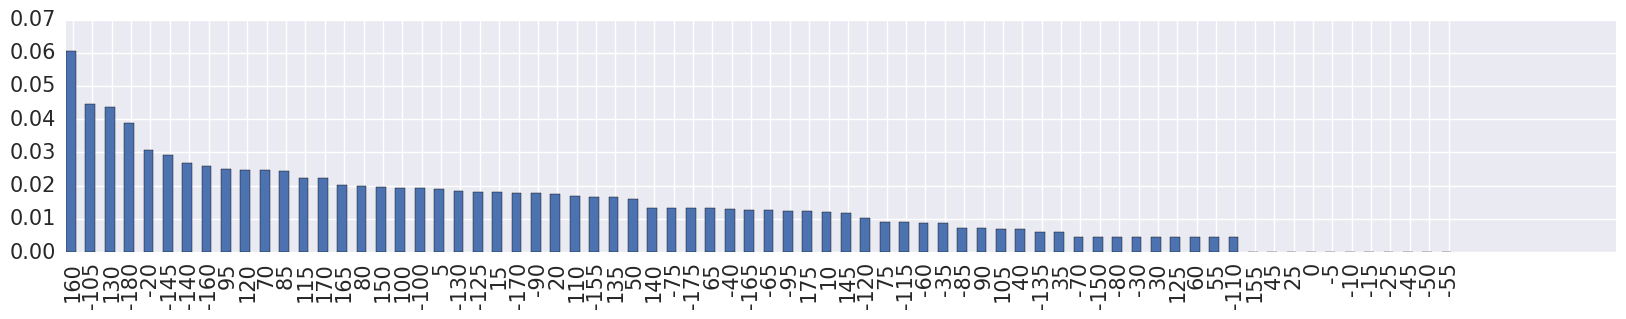

In [26]:
sns.set(font_scale=1.5)  # crazy big
#fig = plt.figure(figsize=(7, 5))
fig = plt.figure(1, figsize=(20, 3))
ax = fig.add_subplot(111)
ax.bar(range(72), count, 0.5)
ax.set_ylabel('')
ax.set_title('')
ax.set_xticks(np.arange(72)+0.35)
ax.set_xticklabels(bins, rotation='vertical')
plt.show()

## Mixed sounds (nb of sources)

In [104]:
#fig = plt.figure(1, figsize=(6, 3))
#ax = fig.add_subplot(111)
count = nbSources[0]
count = count / float(np.sum(count))
bins = []
for i in range(5):
    if i < 2:
        bins.append(str(i) + ' source')
    else:
        bins.append(str(i) + ' sources')
count, bins = (list(t) for t in zip(*sorted(zip(count, bins), reverse=True)))

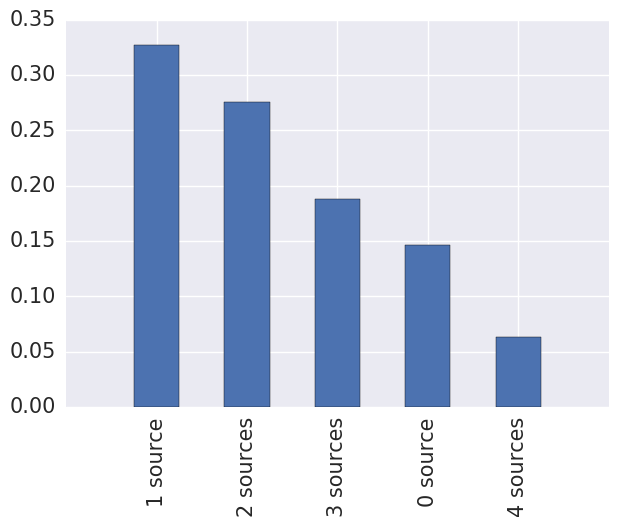

In [105]:
sns.set(font_scale=1.5)  # crazy big
fig = plt.figure(figsize=(7, 5))
plt.bar(range(5), count, 0.5, align='center')
plt.xticks(range(5), bins, rotation='vertical')
plt.title("")
plt.show()

# Feature representation

In [38]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 22})

In [39]:
test_ = h5py.File("/mnt/raid/data/ni/twoears/kashefy/localization/clean_multiAzimuth/gen20160705/concat_sampled_bal_split_200/twoears_data_test_005.h5", "r")
train_ = h5py.File("/mnt/raid/data/ni/twoears/kashefy/localization/clean_multiAzimuth/gen20160705/concat_sampled_bal_split_200/twoears_data_train_005.h5", "r")
bins = ['alarm', 'baby', 'crash', 'dog', 'engine', 'female\nspeech', 'fire', 'footsteps', 'general', 'knock', 'phone', 'piano', 'scream']

In [40]:
import matplotlib.ticker as ticker
sns.set(font_scale=1.5)  # crazy big

RMP


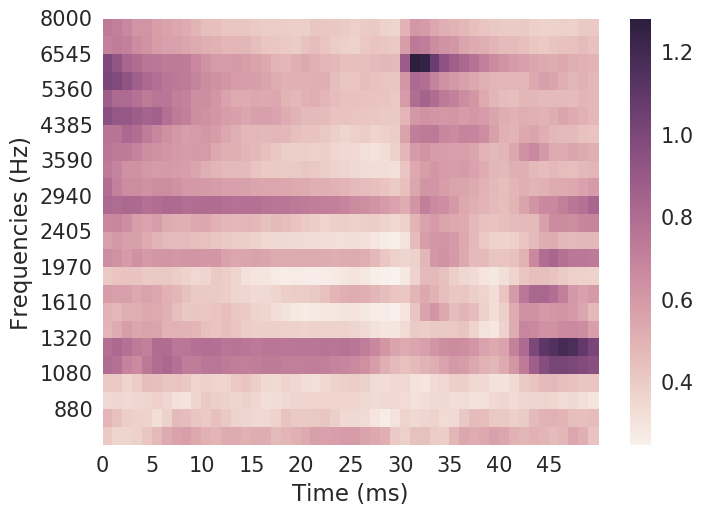

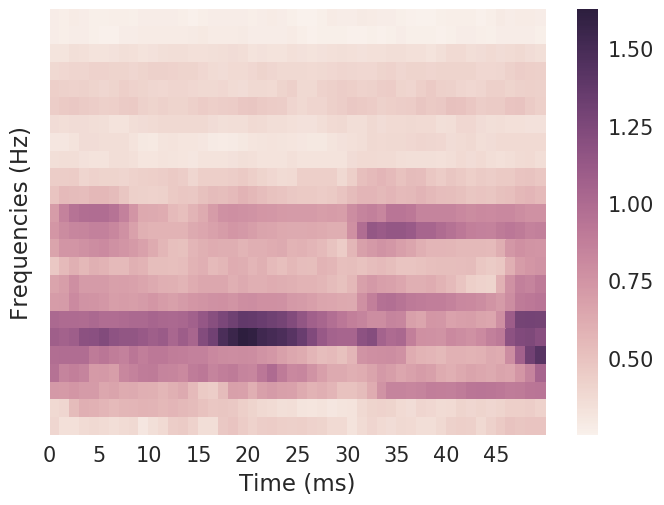

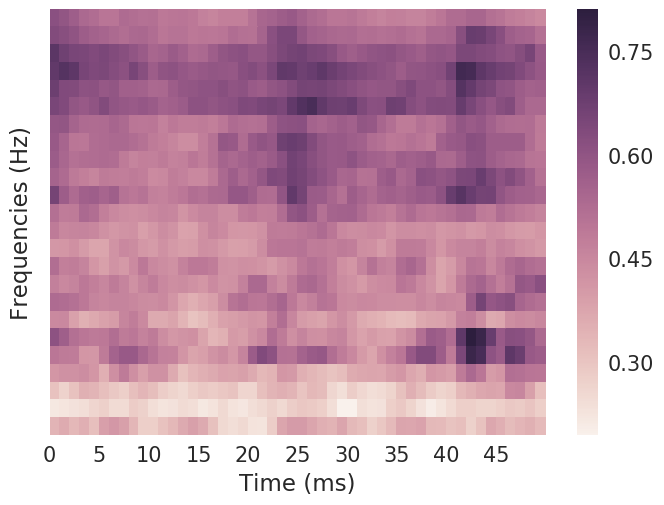

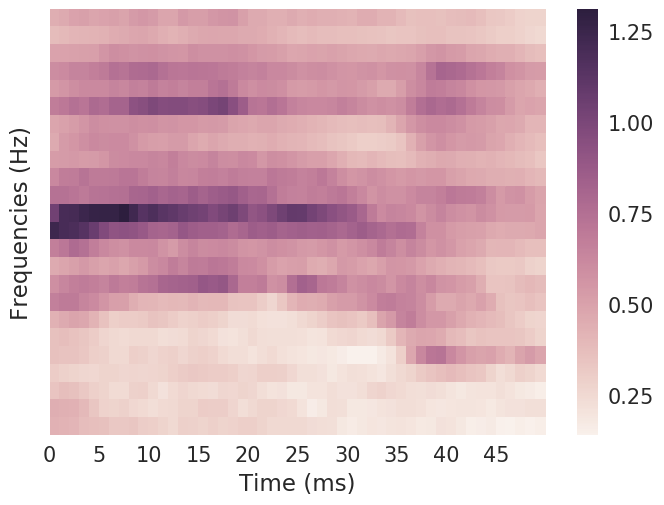

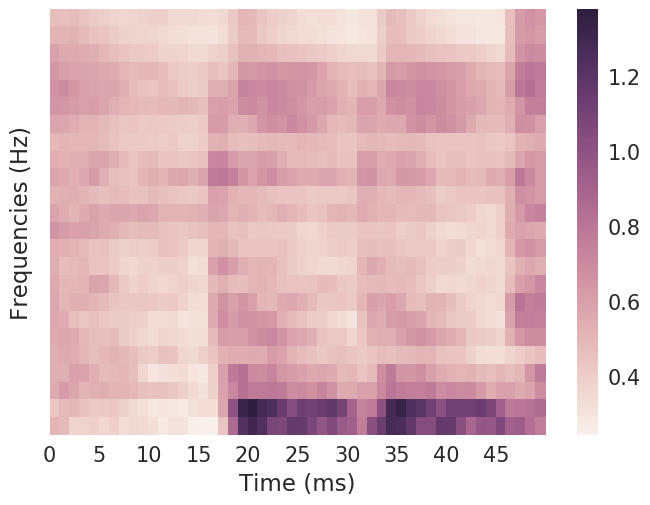

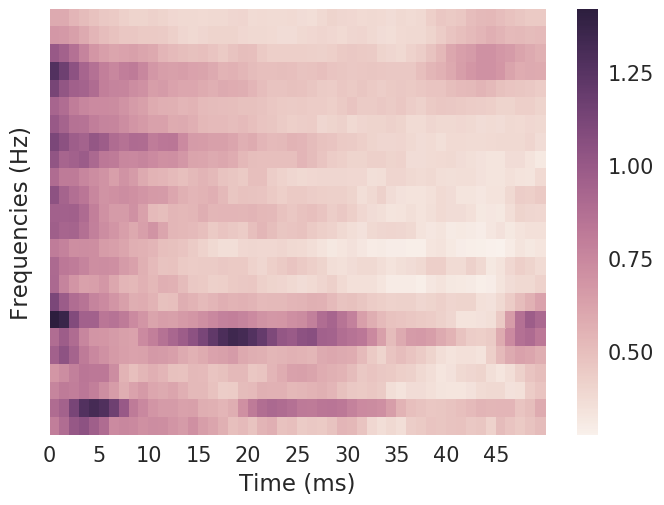

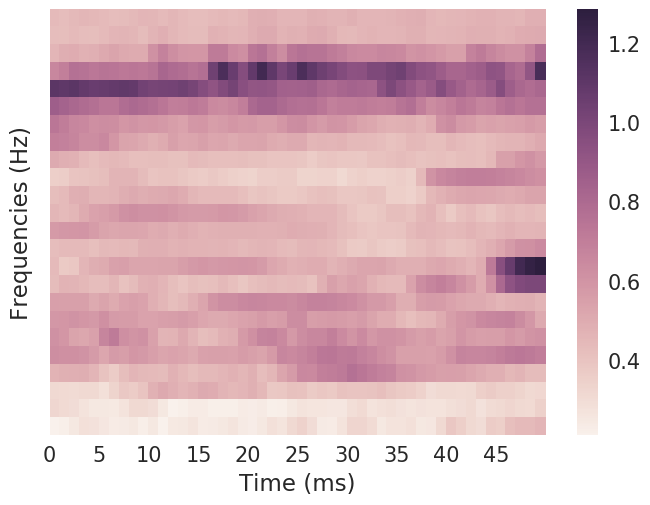

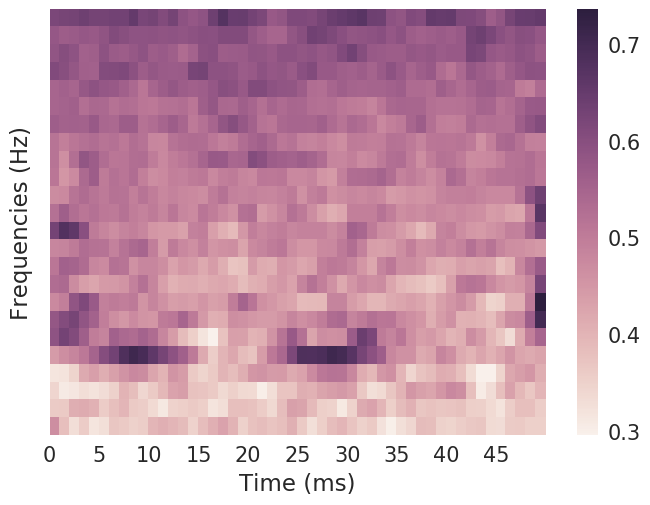

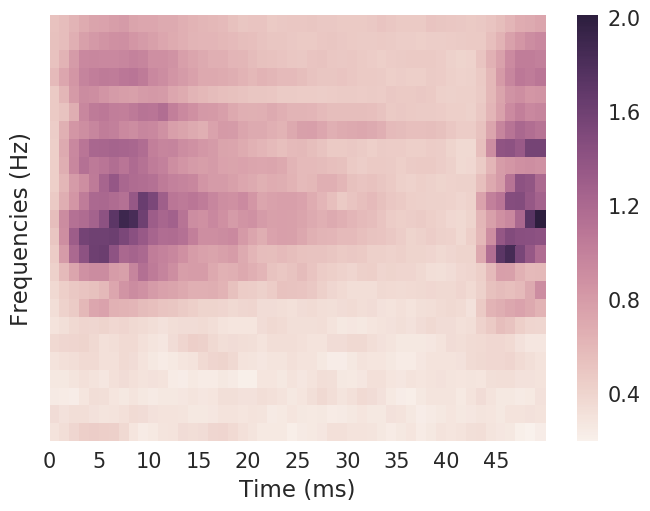

In [72]:
nmax = 24
k = (8000/800)**(1./(nmax-1))
def arrondir(nombre):
    return int(nombre) - int(nombre) % 5
def take_one_on_two(liste):
    res = []
    for i in range(len(liste)):
        if i % 2 == 0:
            res.append(liste[i])
    return res
frequencies = reversed([arrondir(round(800*k**n)) for n in range(nmax)])
print "RMP"
for i in range(20):
    labels = train["label"][i,:,0]
    if np.sum(labels) == 1:
        ax = sns.heatmap(train["ratemap"][i,0,:,:])
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))
        plt.yticks(np.arange(0, nmax, 2), take_one_on_two(list(frequencies)), rotation='horizontal')
        ax.invert_yaxis()
        plt.ylabel("Frequencies (Hz)")
        plt.xlabel("Time (ms)")
        #plt.title("Left-channel ratemap for "+bins[np.argmax(labels)]+" class")
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
        plt.xticks(np.arange(0, 50, 5), np.arange(0, 50, 5), rotation='horizontal')
        plt.savefig("images/rmp"+str(i)+".png")
        plt.show()

ILD


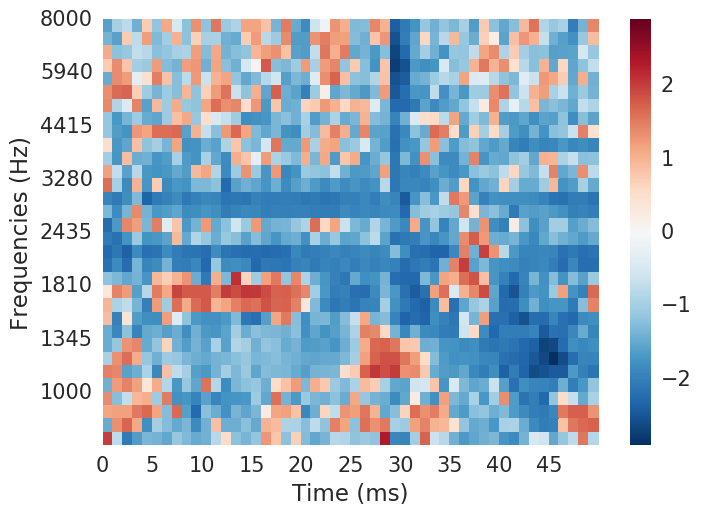

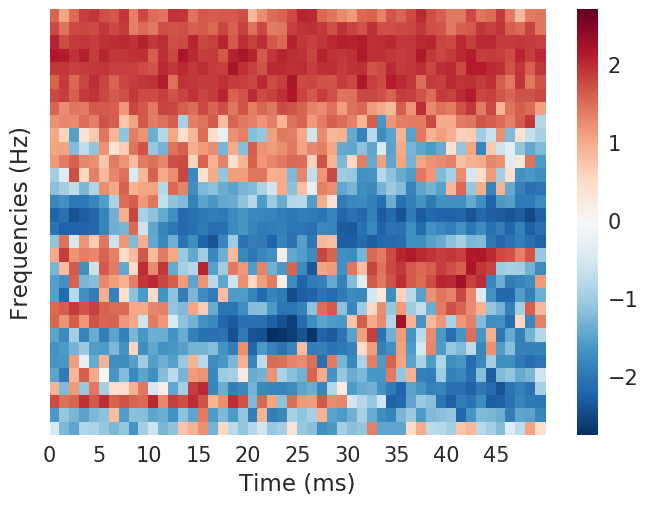

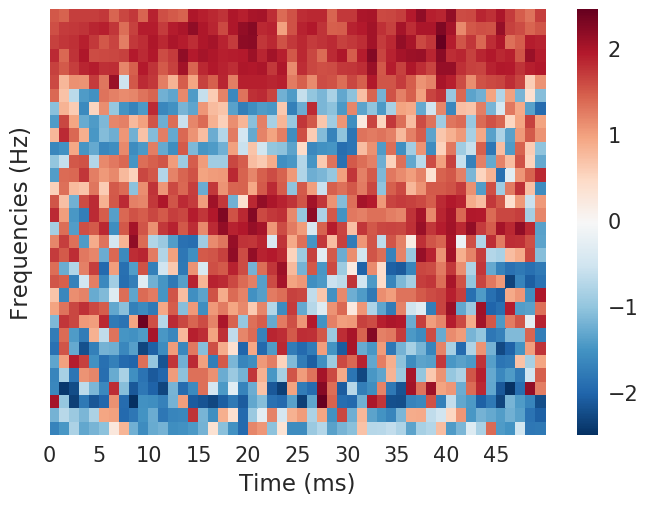

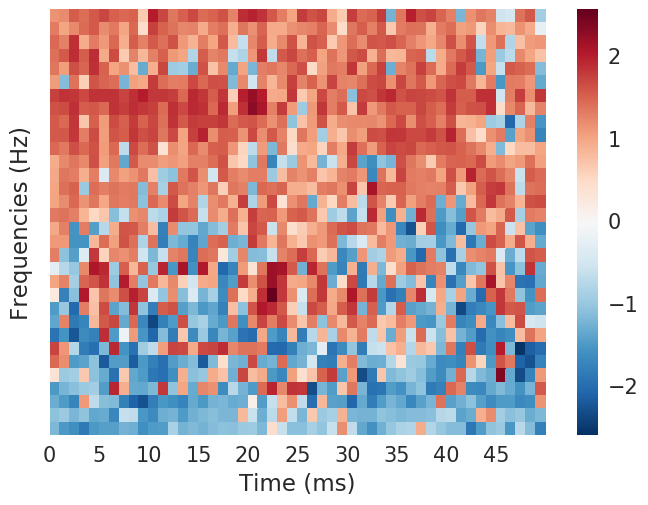

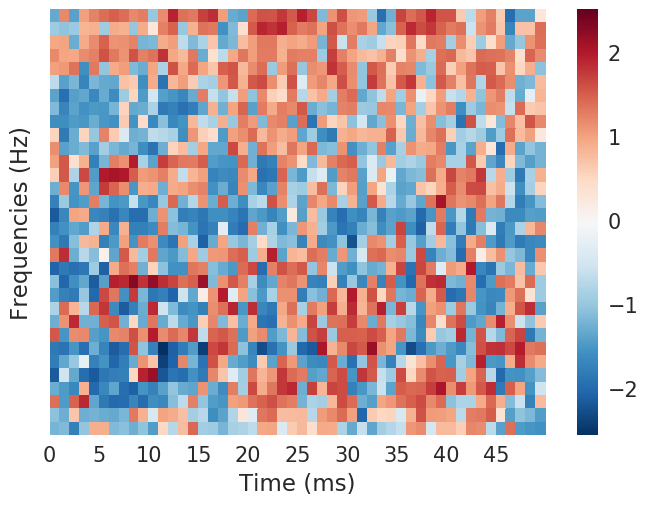

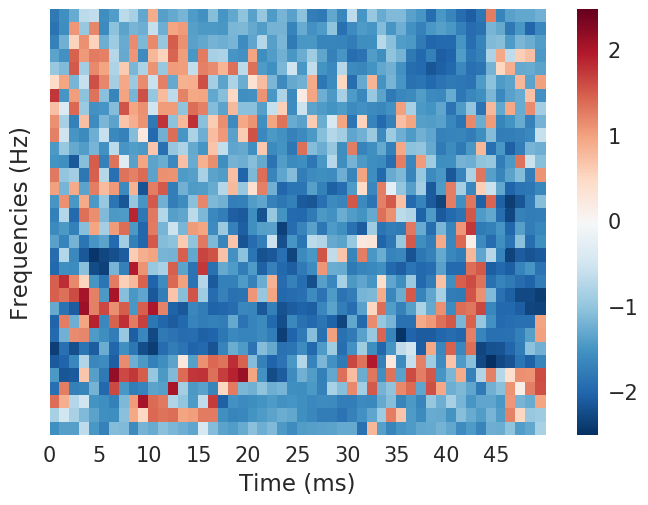

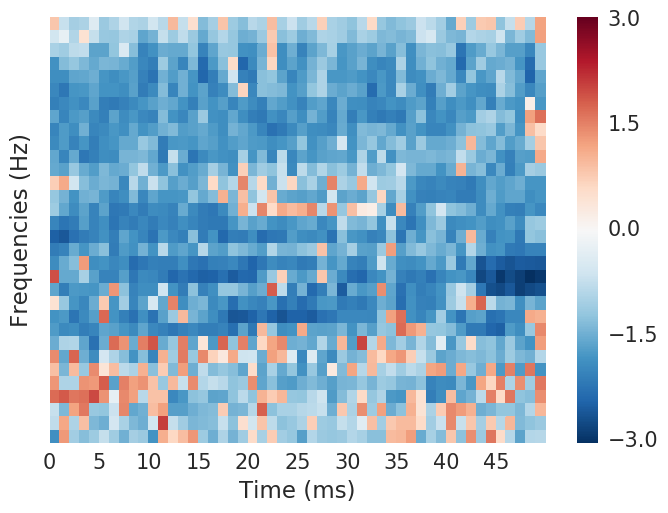

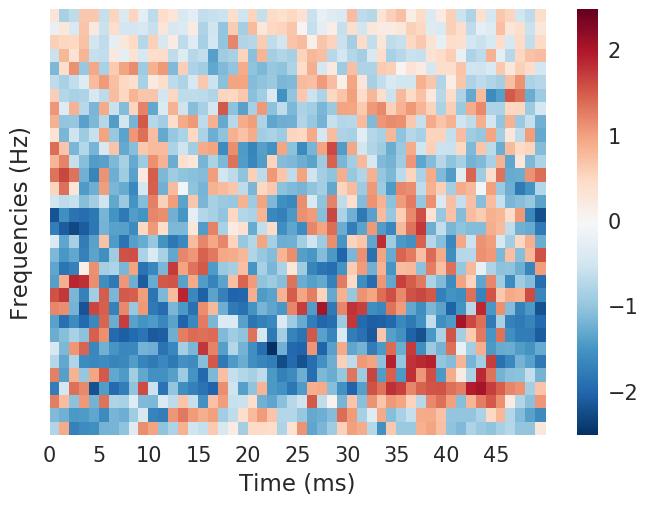

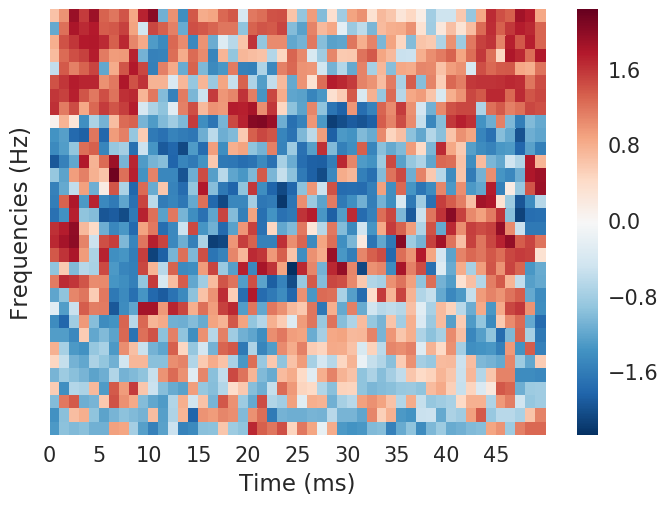

In [79]:
nmax = 32
k = (8000/800)**(1./(nmax-1))
frequencies = reversed([arrondir(round(800*k**n)) for n in range(nmax)])
def take_one_on_four(liste):
    res = []
    for i in range(len(liste)):
        if i % 4 == 0:
            res.append(liste[i])
    return res
print "ILD"
for i in range(20):
    labels = train["label"][i,:,0]
    if np.sum(labels) == 1:
        ax = sns.heatmap(train["ild"][i,0,:,:])
        ax.invert_yaxis()
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=4))
        plt.yticks(np.arange(0, nmax, 4), take_one_on_four(list(frequencies)), rotation='horizontal')
        plt.ylabel("Frequencies (Hz)")
        plt.xlabel("Time (ms)")
        #plt.title("Interaural level difference for "+bins[np.argmax(labels)]+" class")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
        plt.xticks(np.arange(0, 50, 5), np.arange(0, 50, 5), rotation='horizontal')
        plt.savefig("images/ild"+str(i)+".png")
        plt.show()

AMS
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


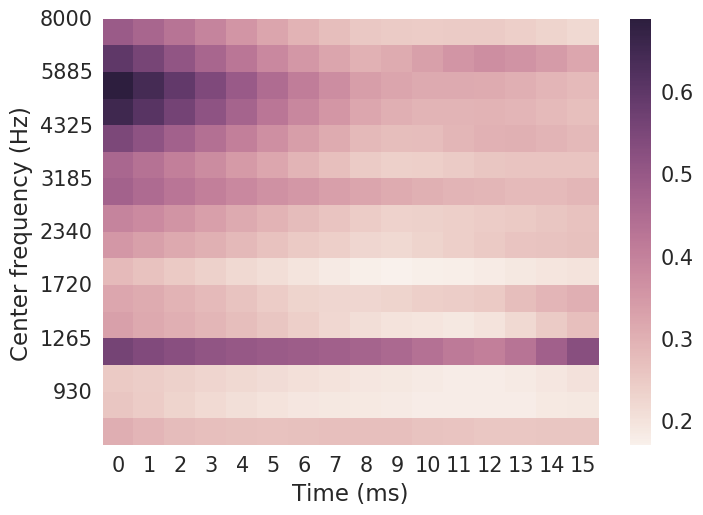

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


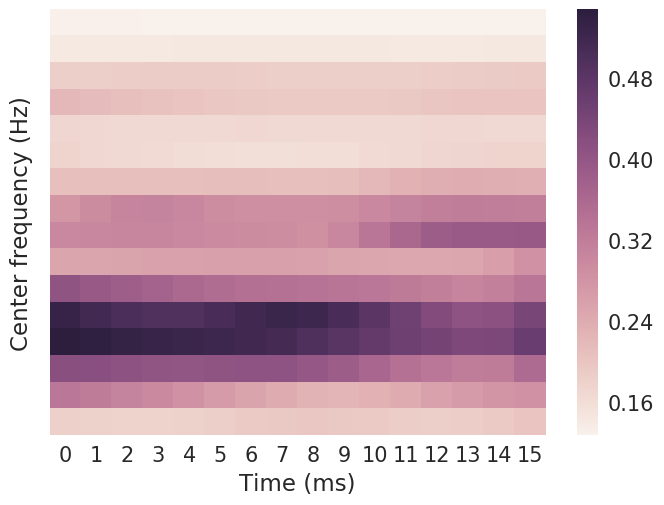

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


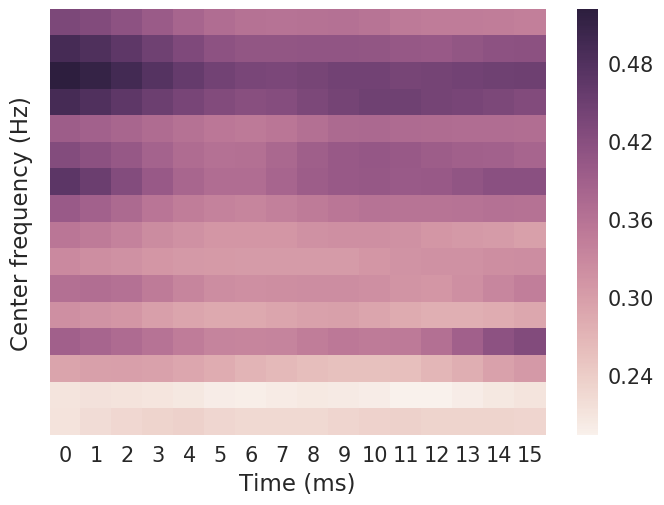

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


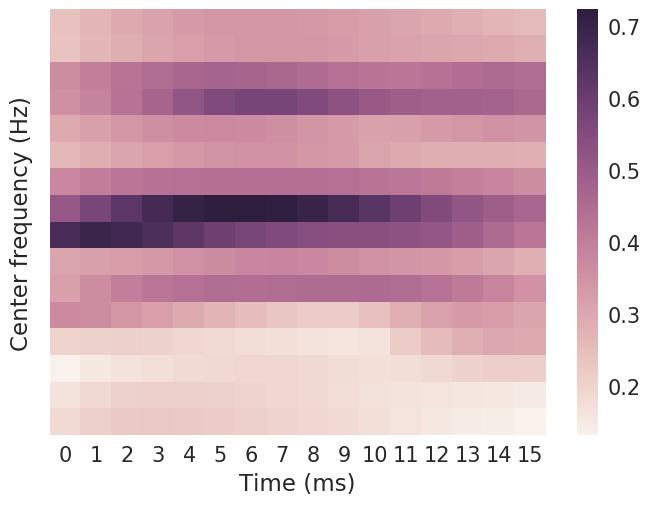

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


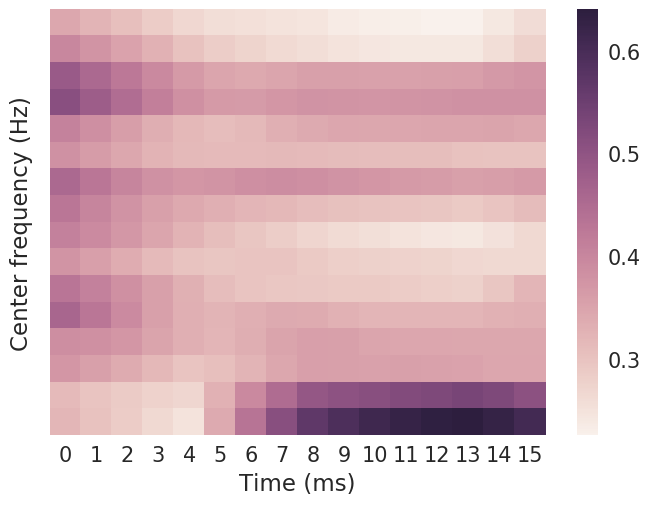

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


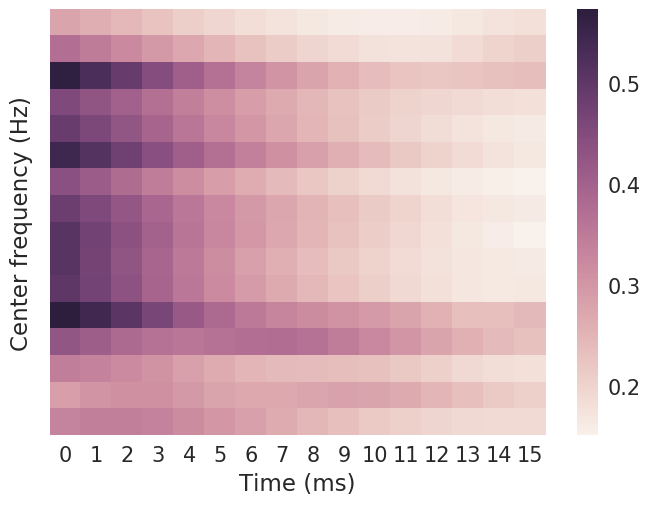

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


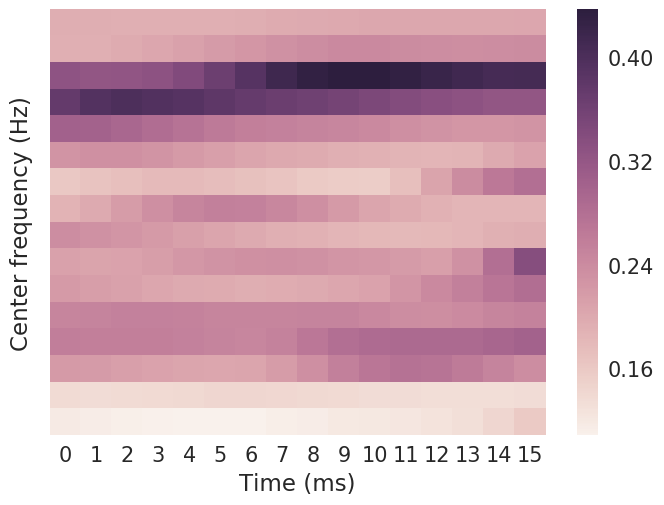

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


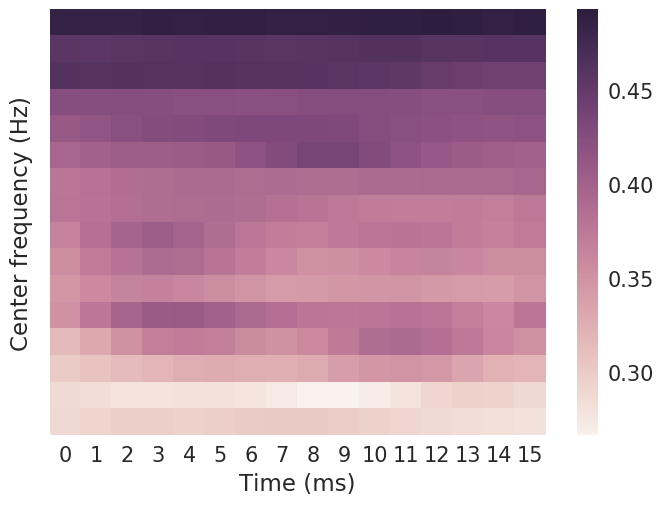

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


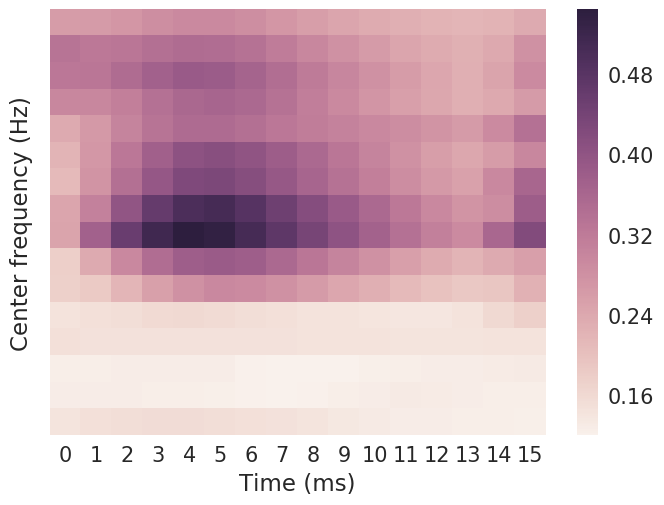

In [76]:
nmax = 16
k = (8000/800)**(1./(nmax-1))
frequencies = reversed([arrondir(round(800*k**n)) for n in range(nmax)])
print "AMS"
for i in range(20):
    labels = train["label"][i,:,0]
    if np.sum(labels) == 1:
        print labels
        ax = sns.heatmap(train["amsFeatures"][i,0,:,:])
        ax.invert_yaxis()
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))
        plt.yticks(np.arange(0, nmax, 2), take_one_on_two(list(frequencies)), rotation='horizontal')
        plt.ylabel("Center frequency (Hz)")
        plt.xlabel("Time (ms)")        
        #plt.title("Left-channel first amplitude modulation spectrogram for "+classes[np.argmax(labels)]+" class")
        #ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
        #plt.xticks(np.arange(0, 50, 5), np.arange(0, 50, 5), rotation='horizontal')
        plt.show()